this is primarily based on DOI: 10.1103/physrevresearch.4.l022020

# imports

In [1]:
# import important functions that are always needed.
from library import *

In [6]:
plt.rcParams["font.size"]

10.0

# constructing the circuit

convention: $|0\rangle \;\hat =\; |\uparrow\rangle \;\hat =\; |1\rangle \quad \land \quad |1\rangle \;\hat =\; |\downarrow\rangle \;\hat =\; |-1\rangle$

# spin order parameters

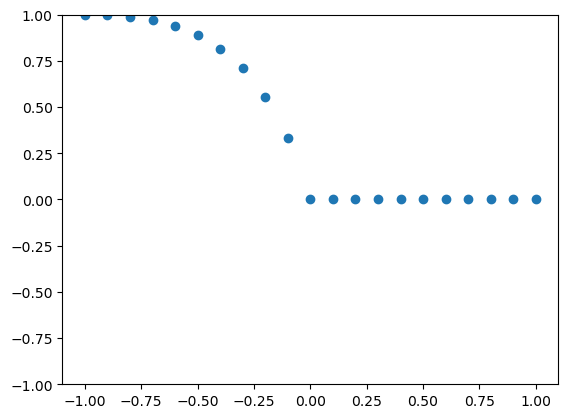

In [2]:
observable_string = 'zyxyz'
N=len(observable_string)+2
U_O = create_Observable_alignment_gate(get_eigenvectors_per_latice(observable_string))

g_range = np.linspace(-1, 1, 21)
expectation_values = []
probabilities_storage = []
for g in g_range:
    U_1, U = generate_custome_gates(g)
    circ = create_final_circ(U_1, U, U_O)
    outputstate, _ = simulate_circ(circ)
    probabilities = np.abs(outputstate)**2
    probabilities = probabilities.reshape((2,-1,2)).sum(0).sum(-1)
    probabilities_storage.append(probabilities)
    expectation_values.append(calc_expectation_value(probabilities))
plt.scatter(g_range, expectation_values)
plt.ylim(-1,1)
probabilities_storage = np.array(probabilities_storage)

zyxyz 



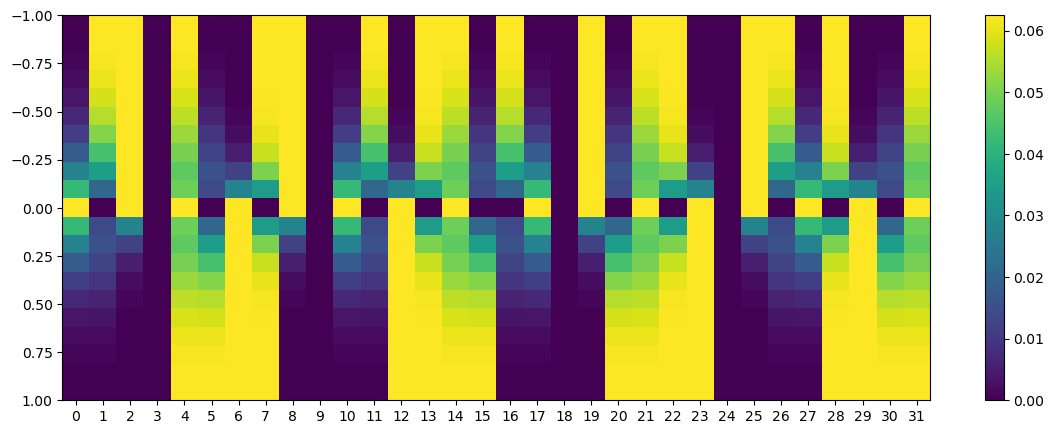

In [3]:
print(observable_string,"\n")
shape = probabilities_storage.shape
plt.figure(figsize=(14,5))
image = plt.imshow(probabilities_storage, extent=[-.5,shape[1]-.5, 1,-1], aspect="auto")
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.colorbar(image)

In [4]:
print(observable_string,"\n")
for index in np.where(probabilities_storage[0]>.02)[0]:
    print(bin(index)[2:].rjust(len(observable_string),"0"))

zyxyz 

00001
00010
00100
00111
01000
01011
01101
01110
10000
10011
10101
10110
11001
11010
11100
11111


# Energy

In [5]:
U_O

Instruction(name='U_O', num_qubits=5, num_clbits=0, params=[])

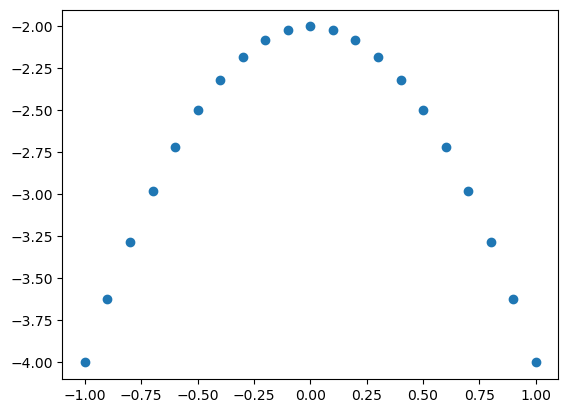

In [6]:
# the observables of the Hamiltonian are:
observable_strings = ['zz', 'x', 'zxz']


g_range = np.linspace(-1, 1, 21)
expectation_values = []
energies = []
probabilities_storage = []
for g in g_range:
    expectation_values.append([])
    U_1, U = generate_custome_gates(g)

    for observable_string in observable_strings:
        N=len(observable_string)+2
        U_O = create_Observable_alignment_gate(get_eigenvectors_per_latice(observable_string))

        circ = create_final_circ(U_1, U, U_O)
        outputstate, _ = simulate_circ(circ)
        probabilities = np.abs(outputstate)**2
        probabilities = probabilities.reshape((2,-1,2)).sum(0).sum(-1)
        expectation_values[-1].append(calc_expectation_value(probabilities))
    
    # !!! the first factor g_zz has the opposite sign to what was written in the paper
    # but like this the simulation gives exactly the same result as what was in the paper's theoretical plot.
    g_factors = np.array([2*(1-g**2), -(1+g)**2, (g-1)**2])
    energies.append(np.dot(np.array(expectation_values[-1]), g_factors))

expectation_values = np.array(expectation_values)

#plt.scatter(g_range, expectation_values)
plt.scatter(g_range, energies)
#plt.grid

In [7]:
for i, expectation_value_of_summand in enumerate(expectation_values.T):
    plt.scatter(g_range, expectation_value_of_summand, label=observable_strings[i])
plt.legend()

# Interferometry

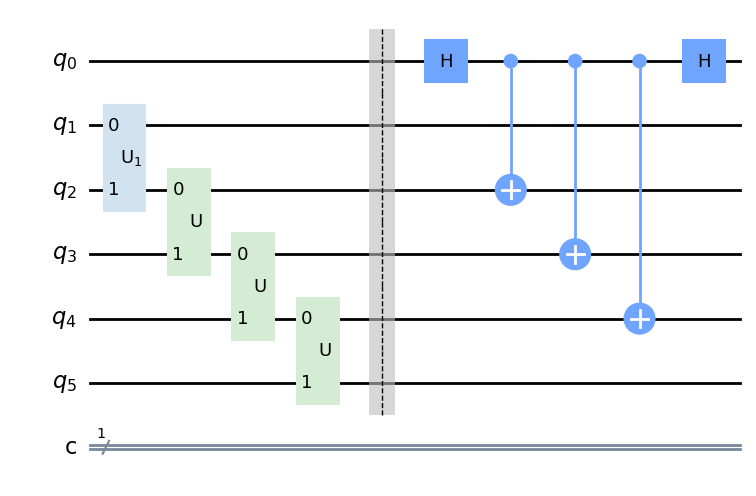

(-1.0, 1.0)

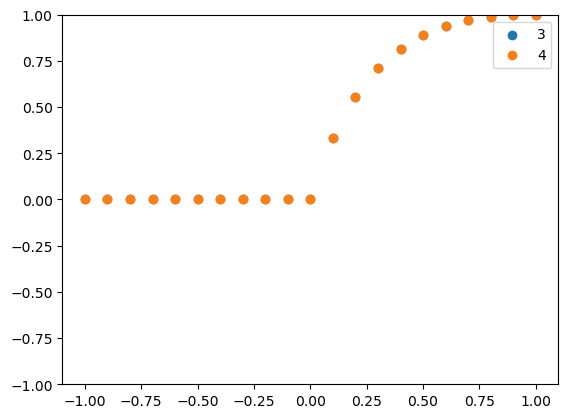

In [8]:

g_range = np.linspace(-1, 1, 21)
expectation_values = []
circ_list = []

#observable_string = 'zyxxyz'
for observable_size in range(3,5):
    observable_string = 'x'*observable_size
    N=len(observable_string)+3
    qubits_to_measure = {0,} #TODO use this here!

    expectation_values.append([])
    for g in g_range:
        U_1, U = generate_custome_gates(g)
        circ = create_final_interferometry_circ(U_1, U, observable_string, draw=(g==-1 and observable_size==3))
        outputstate, _ = simulate_circ(circ)
        probabilities = np.abs(outputstate)**2
        normed_counts = probabilities.reshape((-1,2)).sum(0)
        expectation_values[-1].append(np.dot(normed_counts, [1,-1]))
        circ_list.append(circ)

expectation_values = np.array(expectation_values)

for i, exp_value in enumerate(expectation_values):
    plt.scatter(g_range, exp_value, label=f"{i+3}")
plt.legend()
plt.ylim(-1,1)

In [9]:
print(circ.qasm())

OPENQASM 2.0;
include "qelib1.inc";
gate gate_U_1 q0,q1 { h q0; cx q0,q1; u(pi/2,0,pi) q1; h q1; cx q0,q1; h q1; }
gate gate_U q0,q1 { x q0; u(pi/4,0,0) q1; cx q0,q1; u(-pi/4,0,0) q1; x q0; u(pi/4,0,0) q1; cx q0,q1; u(-pi/4,0,0) q1; x q0; }
qreg q[7];
creg c[1];
gate_U_1 q[1],q[2];
gate_U q[2],q[3];
gate_U q[3],q[4];
gate_U q[4],q[5];
gate_U q[5],q[6];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6];
h q[0];
cx q[0],q[2];
cx q[0],q[3];
cx q[0],q[4];
cx q[0],q[5];
h q[0];



## analysing simulation output

In [9]:
np.where(np.array(outputstate) != 0)

(array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
        104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126]),)

In [10]:
probabilities = np.abs(outputstate)**2
probabilities = probabilities.reshape((2,-1,2)).sum(0).sum(-1)
calc_expectation_value(probabilities)

0.0

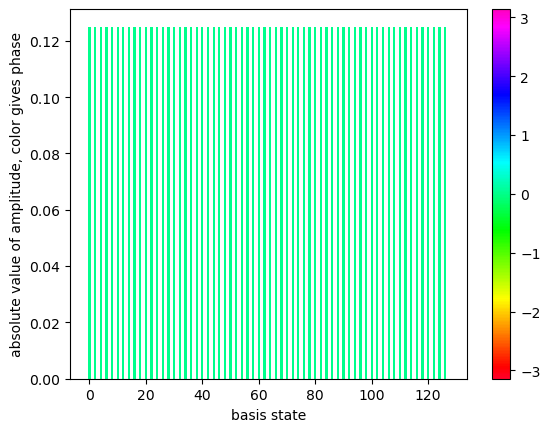

In [11]:
plot_state_vector(outputstate)

# running the circuit

## select backend

In [10]:
service, provider = init_IBM_connection()

In [13]:
# find all quantum-computer backends with enough qubits
backends = provider.backends(filters=lambda x: x.configuration().n_qubits >= N 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True)
print(backends)

[<IBMBackend('ibm_brisbane')>]


In [24]:
# choose the least busy backend
backend = least_busy(backends)
print("least busy backend: ", backend)

least busy backend:  <IBMBackend('ibmq_jakarta')>


In [25]:
# choose a specific one
backend = backends[-1]
backend

<IBMBackend('ibm_nairobi')>

## run circuit

In [ ]:
# add mesurements to circuit
for circ in circ_list:
    circ.measure(qubits_to_measure, range(len(qubits_to_measure)))

In [ ]:
len(circ_list)

In [ ]:
shots = 2048*4
transpiled_qc = transpile(circ_list, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots, job_tags=["MPS", "spin-order parameters"])

In [40]:
job.queue_info()

In [ ]:
job_monitor(job)

In [ ]:
# get pending job in case of jupyter crashing etc.
job = provider.runtime.jobs(pending=True)[0]

## get old jobs

In [9]:
ids = ["cijc5535n9v6ta2sr26g", "cik0nlmuepl060pda4kg"]

job = provider.jobs(job_tags=["MPS"])[0]
# the format of the counts of old jobs is different. The keys have a '0x' infront. To handle this store whether current job is new or old
old_job = True
job

<IBMCircuitJob('cik0nlmuepl060pda4kg')>

In [10]:
job

<IBMCircuitJob('cik0nlmuepl060pda4kg')>

In [11]:
jobs = service.jobs(job_tags='MPS')
jobs

[<RuntimeJob('cik0nlmuepl060pda4kg', 'circuit-runner')>,
 <RuntimeJob('cijc5535n9v6ta2sr26g', 'circuit-runner')>]

In [45]:
job.circuits()[0]

{'header': {'backend_name': 'ibm_perth', 'backend_version': '1.2.7'},
 'qobj_id': 'e2607c2f-42c6-4ce9-8106-d9eec57fa93c',
 'experiments': [{'config': {'n_qubits': 7, 'memory_slots': 1},
   'header': {'name': 'circuit-2650',
    'n_qubits': 7,
    'qreg_sizes': [['q', 7]],
    'qubit_labels': [['q', 0],
     ['q', 1],
     ['q', 2],
     ['q', 3],
     ['q', 4],
     ['q', 5],
     ['q', 6]],
    'metadata': {},
    'creg_sizes': [['c', 1]],
    'clbit_labels': [['c', 0]],
    'global_phase': 0,
    'memory_slots': 1},
   'instructions': [{'params': [1.5707963267948966],
     'qubits': [0],
     'name': 'rz'},
    {'name': 'sx', 'qubits': [0]},
    {'qubits': [0], 'name': 'rz', 'params': [1.5707963267948966]},
    {'name': 'cx', 'qubits': [0, 1]},
    {'qubits': [1], 'name': 'rz', 'params': [-1.5707963267948968]},
    {'name': 'sx', 'qubits': [1]},
    {'name': 'rz', 'params': [-0.8410816232223421], 'qubits': [1]},
    {'name': 'sx', 'qubits': [1]},
    {'params': [1.5707963267948966], 

In [12]:
help(job.result())

Help on Result in module qiskit.result.result object:

class Result(builtins.object)
 |  Result(backend_name, backend_version, qobj_id, job_id, success, results, date=None, status=None, header=None, **kwargs)
 |  
 |  Model for Results.
 |  
 |  Attributes:
 |      backend_name (str): backend name.
 |      backend_version (str): backend version, in the form X.Y.Z.
 |      qobj_id (str): user-generated Qobj id.
 |      job_id (str): unique execution id from the backend.
 |      success (bool): True if complete input qobj executed correctly. (Implies
 |          each experiment success)
 |      results (list[ExperimentResult]): corresponding results for array of
 |          experiments of the input qobj
 |  
 |  Methods defined here:
 |  
 |  __getattr__(self, name)
 |  
 |  __init__(self, backend_name, backend_version, qobj_id, job_id, success, results, date=None, status=None, header=None, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__

In [19]:
results = job.result().results
shots = results[0].shots

for result in results:
    if result.shots != shots: raise NotImplementedError('analysis for different number of shots in one job not implemented.')

counts = [result['data']['counts'] for result in results]
counts

TypeError: 'ExperimentResult' object is not subscriptable

In [27]:
job.result().get_counts()

[{'0': 4154, '1': 4038},
 {'0': 4161, '1': 4031},
 {'0': 4195, '1': 3997},
 {'0': 4041, '1': 4151},
 {'0': 4069, '1': 4123},
 {'0': 4057, '1': 4135},
 {'0': 4181, '1': 4011},
 {'0': 4177, '1': 4015},
 {'0': 4183, '1': 4009},
 {'0': 3958, '1': 4234},
 {'0': 3959, '1': 4233},
 {'0': 4248, '1': 3944},
 {'0': 4522, '1': 3670},
 {'0': 4604, '1': 3588},
 {'0': 4918, '1': 3274},
 {'0': 5012, '1': 3180},
 {'0': 4877, '1': 3315},
 {'0': 4890, '1': 3302},
 {'0': 5342, '1': 2850},
 {'0': 5085, '1': 3107},
 {'0': 5513, '1': 2679},
 {'0': 3977, '1': 4215},
 {'0': 4051, '1': 4141},
 {'0': 4113, '1': 4079},
 {'0': 4093, '1': 4099},
 {'0': 4065, '1': 4127},
 {'0': 3951, '1': 4241},
 {'0': 4105, '1': 4087},
 {'0': 4093, '1': 4099},
 {'0': 4085, '1': 4107},
 {'0': 4069, '1': 4123},
 {'0': 4020, '1': 4172},
 {'0': 4111, '1': 4081},
 {'0': 4106, '1': 4086},
 {'0': 4053, '1': 4139},
 {'0': 4093, '1': 4099},
 {'0': 4040, '1': 4152},
 {'0': 3995, '1': 4197},
 {'0': 4003, '1': 4189},
 {'0': 4014, '1': 4178},


## analysis

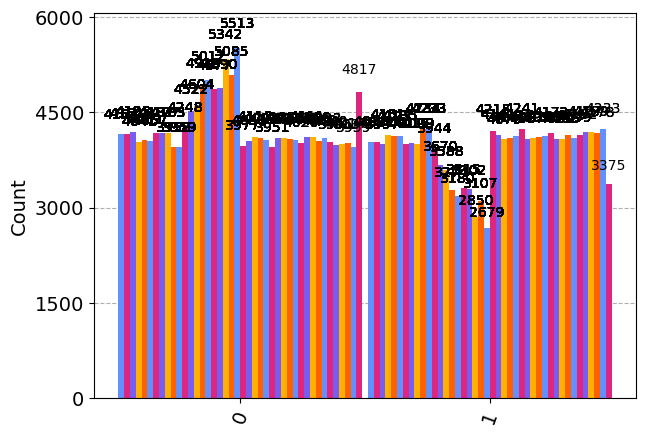

In [22]:
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
counts_of_zero = np.array([count['0x0' if old_job else '0'] for count in counts])
counts_of_zero = counts_of_zero.reshape((-1, len(g_range)))
counts_of_zero

In [ ]:
expectation_values = np.array(counts_of_zero)/shots*2-1

# using sigma = sqrt((<O^2>-<O>^2) / N) and <O^2> = 1 we get:
expectation_err = np.sqrt((1 - expectation_values**2) / shots)


for i, (exp_value, exp_err) in enumerate(zip(expectation_values, expectation_err)):
    #plt.scatter(g_range, exp_value)
    plt.errorbar(g_range, exp_value, yerr=exp_err, fmt=".", capsize=3, label=f"{i+3}")
plt.legend()
plt.ylim(-1,1)

In [ ]:
expectation_values = np.array(counts_of_zero)/shots*2-1


for i, exp_value in enumerate(expectation_values):
    plt.scatter(g_range, exp_value, label=f"{i+3}")
plt.legend()
plt.ylim(-1,1)

# using Estimator class

In [ ]:
from qiskit_ibm_runtime.estimator import Estimator

In [ ]:
?Estimator._run_primitive

In [ ]:
with open("/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/base_primitive.py", "r") as f:
    print(f.read())

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [ ]:
!lscpu